In [288]:
import os
import sys
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset

import seaborn as sns

In [289]:
!python --version

Python 3.12.11


In [290]:
display(
    torch.__version__,
    torchvision.__version__
)

'2.7.1+cpu'

'0.22.1+cpu'

In [4]:
torch.cuda.manual_seed_all(101)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [291]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# Tensors

## Создание тензора

### torch.**T**ensor

In [292]:
torch.Tensor(3, 2, 5)

tensor([[[-8.5190e+03,  1.7096e-42,  4.5151e-03, -7.7200e-02,  3.7489e-02],
         [-2.4698e-02, -7.4848e-03, -4.2764e-03,  9.9621e-02, -3.3961e-02]],

        [[-4.9171e-03,  5.3269e-02, -2.5598e-02,  1.0792e-02,  0.0000e+00],
         [-3.2508e-02,  1.0035e-01,  5.5272e-02,  1.1212e-03,  1.4515e-02]],

        [[-3.1364e-02,  2.7110e-02, -1.1562e-01,  6.5597e-02,  9.2515e-02],
         [ 3.0939e-02, -3.0480e-02,  1.5271e-01,  4.9080e-02, -1.4381e-02]]])

### torch.empty

In [293]:
torch.empty(3, 2, 5)

tensor([[[-8.5122e+03,  1.7096e-42, -3.2673e-02, -7.6239e-03,  2.6839e-02],
         [-1.8112e-01, -1.7891e-01, -7.9252e-03,  7.8261e-02, -1.1617e-02]],

        [[ 2.1311e-01, -1.1711e-01, -5.8699e-02,  6.6622e-02,  0.0000e+00],
         [-2.4907e-02,  1.4408e-02, -3.2625e-02, -1.7732e-01,  8.2184e-02]],

        [[-9.3908e-02,  1.2493e-02,  3.4888e-02, -3.6115e-02,  1.8915e-02],
         [ 1.1123e-01,  1.5971e-02,  8.1375e-02,  5.6360e-02, -4.0869e-02]]])

In [294]:
torch.empty(3, 1, 5).dtype

torch.float32

In [8]:
torch.empty(3, 1, 5, dtype=torch.int32)

tensor([[[-972750720,       1220,          0,          0,          0]],

        [[         0,          0,          0,          0,          0]],

        [[         0,          0,          0,          0,          0]]],
       dtype=torch.int32)

In [10]:
torch.empty(3, 2, 5, dtype=torch.float32)

tensor([[[-8.5126e+03,  1.7096e-42,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]]])

### Типы данных в torch

In [15]:
(
    torch.float16, # 16 бит
    torch.float32, # 32 бит
    torch.float64, # 64 бит
    torch.int8, # 8 бит
    torch.int16, # 16 бит
    torch.int32, # 32 бит
    torch.int64, # 64 бит
    torch.uint8, # 8 бит беззнаковый
    torch.bool # булевый
)

(torch.float16,
 torch.float32,
 torch.float64,
 torch.int8,
 torch.int16,
 torch.int32,
 torch.int64,
 torch.uint8,
 torch.bool)

In [295]:
torch.Tensor([3, 2, 5])

tensor([3., 2., 5.])

In [296]:
torch.Tensor(8)

tensor([-8.3845e+03,  1.7096e-42,  4.1176e-01,  3.8824e-01,  3.4118e-01,
         3.0196e-01, -4.3032e+00, -1.3324e-01])

In [18]:
torch.Tensor(1, 8)

tensor([[0., 0., 0., 0., 0., 0., 0., 0.]])

In [297]:
torch.Tensor([1, 2, 3], [8, 9 ,10])

TypeError: new() received an invalid combination of arguments - got (list, list), but expected one of:
 * (*, torch.device device = None)
      didn't match because some of the arguments have invalid types: ([31;1mlist of [int, int, int][0m, [31;1mlist of [int, int, int][0m)
 * (torch.Storage storage)
 * (Tensor other)
 * (tuple of ints size, *, torch.device device = None)
 * (object data, *, torch.device device = None)


### torch.**t**ensor

In [298]:
torch.tensor([123])

tensor([123])

In [299]:
torch.tensor([1, 2, 3])

tensor([1, 2, 3])

In [302]:
torch.tensor([[1, 2, 3], [1, 2, 3]]).dtype

torch.int64

In [303]:
torch.tensor([[1, 2, 3], [1, 2.0, 3]]).dtype

torch.float32

In [304]:
torch.tensor([[1, 2, 3], [1, 2, 3]], dtype=torch.float32)

tensor([[1., 2., 3.],
        [1., 2., 3.]])

### Из массива numpy

In [305]:
t = np.array([[0, 1, 2], [5, 4, 3]])
t

array([[0, 1, 2],
       [5, 4, 3]])

In [306]:
t = torch.tensor(t, dtype=torch.float16)
t

tensor([[0., 1., 2.],
        [5., 4., 3.]], dtype=torch.float16)

In [307]:
numpy_array = t.numpy()
numpy_array

array([[0., 1., 2.],
       [5., 4., 3.]], dtype=float16)

### zeros & ones & eye

In [308]:
torch.zeros(15, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [309]:
torch.zeros(15, 5, dtype=torch.int16)

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int16)

In [311]:
torch.ones(1,2,3)

tensor([[[1., 1., 1.],
         [1., 1., 1.]]])

In [312]:
torch.eye(5)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [313]:
torch.eye(5,3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [314]:
torch.eye(5,3, 5)

TypeError: eye() received an invalid combination of arguments - got (int, int, int), but expected one of:
 * (int n, *, Tensor out = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
 * (int n, int m, *, Tensor out = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)


### size & dim

In [315]:
t = torch.tensor([[1, 2, 3], [1, 2, 3]], dtype=torch.float32)

In [316]:
t.dim()

2

In [39]:
t.size()

torch.Size([2, 3])

In [46]:
t = torch.tensor(
    [
        [[1, 2], [1, 2]],
        [[1, 2], [1, 2]],
        [[1, 2], [1, 2]]
    ]
)

In [47]:
t.size(), t.dim()

(torch.Size([3, 2, 2]), 3)

In [264]:
t = torch.tensor(
    [
        [[1, 2], [1, 2], [1, 2], [1, 2]],
        [[1, 2], [1, 2], [1, 2], [1, 2]],
        [[1, 2], [1, 2], [1, 2], [1, 2]]
    ]
)

In [265]:
t.size(), t.dim()

(torch.Size([3, 4, 2]), 3)

## Inplace methods

In [317]:
sample = torch.IntTensor(2,7)
sample

tensor([[ -972744192,        1220,  1024769195,  1027170448,  1005285302,
         -1115177175, -1124941329],
        [-1106699960,  1029671224, -1120810100,  1021070020, -1112351262,
         -1110186395, -1117247908]], dtype=torch.int32)

In [318]:
sample.abs()

tensor([[ 972744192,       1220, 1024769195, 1027170448, 1005285302, 1115177175,
         1124941329],
        [1106699960, 1029671224, 1120810100, 1021070020, 1112351262, 1110186395,
         1117247908]], dtype=torch.int32)

In [319]:
sample

tensor([[ -972744192,        1220,  1024769195,  1027170448,  1005285302,
         -1115177175, -1124941329],
        [-1106699960,  1029671224, -1120810100,  1021070020, -1112351262,
         -1110186395, -1117247908]], dtype=torch.int32)

In [320]:
sample.abs_()

tensor([[ 972744192,       1220, 1024769195, 1027170448, 1005285302, 1115177175,
         1124941329],
        [1106699960, 1029671224, 1120810100, 1021070020, 1112351262, 1110186395,
         1117247908]], dtype=torch.int32)

In [57]:
sample

tensor([[972749952,      1220,         0,         0,         0,         0,
                 0],
        [        0,         0,         0,         0,         0,         0,
                 0]], dtype=torch.int32)

## Tensor view

In [321]:
a = torch.Tensor(36)
a

tensor([ 0.7961,  0.8510,  0.8510,  0.8039,  0.7333,  0.7098,  0.9137,  0.6784,
         0.5843,  0.5137,  0.4980,  0.5137,  0.8980,  0.6314,  0.6784, -0.2157,
        -0.1843, -0.1216, -0.7882, -0.7961, -0.7882, -0.8196, -0.8039, -0.8275,
        -0.8196, -0.8039, -0.8275, -0.8510, -0.7725, -0.6471, -0.7804, -0.8588,
        -0.8588, -0.7725, -0.6078, -0.6000])

In [322]:
b = a.view(12,3)
b

tensor([[ 0.7961,  0.8510,  0.8510],
        [ 0.8039,  0.7333,  0.7098],
        [ 0.9137,  0.6784,  0.5843],
        [ 0.5137,  0.4980,  0.5137],
        [ 0.8980,  0.6314,  0.6784],
        [-0.2157, -0.1843, -0.1216],
        [-0.7882, -0.7961, -0.7882],
        [-0.8196, -0.8039, -0.8275],
        [-0.8196, -0.8039, -0.8275],
        [-0.8510, -0.7725, -0.6471],
        [-0.7804, -0.8588, -0.8588],
        [-0.7725, -0.6078, -0.6000]])

In [323]:
b == a

RuntimeError: The size of tensor a (3) must match the size of tensor b (36) at non-singleton dimension 1

In [324]:
a[0] = 15

In [325]:
b[0][0]

tensor(15.)

In [326]:
b.ravel()

tensor([15.0000,  0.8510,  0.8510,  0.8039,  0.7333,  0.7098,  0.9137,  0.6784,
         0.5843,  0.5137,  0.4980,  0.5137,  0.8980,  0.6314,  0.6784, -0.2157,
        -0.1843, -0.1216, -0.7882, -0.7961, -0.7882, -0.8196, -0.8039, -0.8275,
        -0.8196, -0.8039, -0.8275, -0.8510, -0.7725, -0.6471, -0.7804, -0.8588,
        -0.8588, -0.7725, -0.6078, -0.6000])

In [327]:
b.half()

tensor([[15.0000,  0.8511,  0.8511],
        [ 0.8037,  0.7334,  0.7100],
        [ 0.9136,  0.6782,  0.5845],
        [ 0.5137,  0.4980,  0.5137],
        [ 0.8979,  0.6313,  0.6782],
        [-0.2157, -0.1843, -0.1216],
        [-0.7881, -0.7959, -0.7881],
        [-0.8198, -0.8037, -0.8276],
        [-0.8198, -0.8037, -0.8276],
        [-0.8511, -0.7725, -0.6470],
        [-0.7803, -0.8589, -0.8589],
        [-0.7725, -0.6079, -0.6001]], dtype=torch.float16)

In [328]:
b.int()

tensor([[15,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]], dtype=torch.int32)

In [329]:
b.long()

tensor([[15,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]])

In [330]:
b.char()

tensor([[15,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]], dtype=torch.int8)

In [70]:
a

tensor([1.5000e+01, 1.7096e-42, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])

In [74]:
torch.arange(0, 10, dtype=torch.float16)

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=torch.float16)

In [77]:
torch.linspace(0, 10, 0, dtype=torch.float16)

tensor([], dtype=torch.float16)

In [78]:
torch.linspace(0, 10, 3, dtype=torch.float16)

tensor([ 0.,  5., 10.], dtype=torch.float16)

# DNN / MLP (Dense Neural Network / Multi-Layer Perceptron)

#### Загрузим ирисы

In [331]:
data = load_iris()

In [333]:
X, y = data.data, data.target

#### Посмотрим на данные:

In [334]:
display(X[:10])
display(y[:60])

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

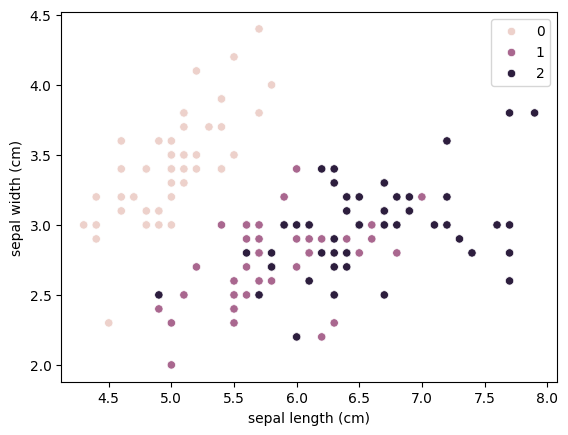

In [335]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

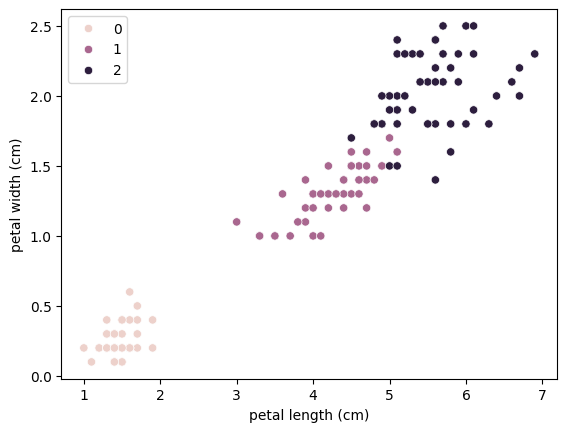

In [336]:
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=y)
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
plt.show()

#### Преобразуем в тензоры 

In [337]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

In [338]:
y_tensor

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

#### Разделение на тренировочные и тестовые данные

In [339]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tensor,
    y_tensor,
    test_size=0.2,
    stratify=y_tensor,
    shuffle=True,
    random_state=101
)

https://docs.pytorch.org/docs/stable/data.html

In [277]:
# Создаем DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [278]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

In [279]:
nn.Module?

Init signature: nn.Module(*args, **kwargs) -> None
Docstring:     
Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing them to be nested in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self) -> None:
            super().__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will also have their
parameters converted when you call :meth:`to`, etc.

.. note::
    As per the example above, an ``__init__()`` call to the parent class
    must be made before assignment on the child.

:ivar training: Boolean represents whether this module is in training or
    

In [346]:
class MLP(nn.Module):
    def __init__(self, input_dim=4, hidden_dim=10, output_dim=3):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)

In [341]:
model = MLP()
model

MLP(
  (net): Sequential(
    (0): Linear(in_features=4, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=3, bias=True)
  )
)

In [342]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.1816,  0.0655, -0.3705, -0.4616],
         [-0.0014,  0.0253, -0.4406, -0.1140],
         [ 0.3936,  0.2898,  0.3296,  0.3765],
         [-0.4664, -0.2479,  0.3840,  0.4758],
         [ 0.0084, -0.0920,  0.4226, -0.2864],
         [ 0.3689, -0.4092, -0.1745, -0.2728],
         [ 0.3142,  0.1658, -0.4895, -0.1047],
         [-0.3619,  0.4082,  0.0597,  0.2680],
         [ 0.2168, -0.4986, -0.3687, -0.2058],
         [ 0.4607,  0.0160,  0.4326, -0.0688]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4470,  0.4324,  0.3799,  0.3627, -0.1353, -0.1228, -0.2843,  0.2238,
          0.3545,  0.0203], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2540, -0.0926,  0.1223, -0.2833, -0.1622,  0.2806, -0.2456, -0.2226,
          -0.1380,  0.1624],
         [-0.2247, -0.0519, -0.1373, -0.2346, -0.2563, -0.1519, -0.0266, -0.2102,
           0.1340, -0.0050],
         [ 0.0688, -0.1086,  0.2544,  0.1866, -0.3116,  0.3033, -0.2685,  0.0950,
     

In [287]:
next(iter(train_loader))

[tensor([[6.2000, 3.4000, 5.4000, 2.3000],
         [5.5000, 3.5000, 1.3000, 0.2000],
         [6.4000, 3.2000, 4.5000, 1.5000],
         [4.8000, 3.0000, 1.4000, 0.1000],
         [5.4000, 3.9000, 1.7000, 0.4000],
         [6.5000, 2.8000, 4.6000, 1.5000],
         [6.0000, 3.0000, 4.8000, 1.8000],
         [6.1000, 2.9000, 4.7000, 1.4000],
         [6.7000, 3.3000, 5.7000, 2.5000],
         [5.6000, 3.0000, 4.1000, 1.3000],
         [7.1000, 3.0000, 5.9000, 2.1000],
         [5.5000, 4.2000, 1.4000, 0.2000],
         [6.9000, 3.1000, 5.1000, 2.3000],
         [7.3000, 2.9000, 6.3000, 1.8000],
         [6.5000, 3.2000, 5.1000, 2.0000],
         [6.3000, 2.3000, 4.4000, 1.3000]]),
 tensor([2, 0, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1])]

In [347]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00005)

# Обучение
for epoch in range(100):
    
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        
    model.eval()

    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    if (epoch + 1) % 5 == 0:
        print(f'Epoch {epoch+1}, Loss: {total_loss:.4f}')
        print(f'Test Accuracy: {100 * correct / total:.2f}%')

Epoch 5, Loss: 0.8642
Test Accuracy: 96.67%
Epoch 10, Loss: 0.8646
Test Accuracy: 96.67%
Epoch 15, Loss: 0.9066
Test Accuracy: 96.67%
Epoch 20, Loss: 0.9635
Test Accuracy: 96.67%
Epoch 25, Loss: 0.8916
Test Accuracy: 96.67%
Epoch 30, Loss: 0.9077
Test Accuracy: 96.67%
Epoch 35, Loss: 0.8672
Test Accuracy: 96.67%
Epoch 40, Loss: 0.9023
Test Accuracy: 96.67%
Epoch 45, Loss: 0.8400
Test Accuracy: 96.67%
Epoch 50, Loss: 0.8878
Test Accuracy: 96.67%
Epoch 55, Loss: 0.8671
Test Accuracy: 96.67%
Epoch 60, Loss: 0.8477
Test Accuracy: 96.67%
Epoch 65, Loss: 0.8834
Test Accuracy: 96.67%
Epoch 70, Loss: 0.9336
Test Accuracy: 96.67%
Epoch 75, Loss: 0.8403
Test Accuracy: 96.67%
Epoch 80, Loss: 0.9509
Test Accuracy: 96.67%
Epoch 85, Loss: 0.8503
Test Accuracy: 96.67%
Epoch 90, Loss: 0.9256
Test Accuracy: 96.67%
Epoch 95, Loss: 0.8764
Test Accuracy: 96.67%
Epoch 100, Loss: 0.8604
Test Accuracy: 96.67%


In [348]:
model_updated = MLP(4, 20, 3)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_updated.parameters(), lr=0.00005)

# Обучение
for epoch in range(500):
    
    model_updated.train()
    total_loss = 0
    for inputs, labels in train_loader:
        
        optimizer.zero_grad()
        outputs = model_updated(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        
    model_updated.eval()

    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model_updated(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    if (epoch + 1) % 50 == 0:
        print(f'Epoch {epoch+1}, Loss: {total_loss:.4f}')
        print(f'Test Accuracy: {100 * correct / total:.2f}%')

Epoch 50, Loss: 10.0982
Test Accuracy: 33.33%
Epoch 100, Loss: 8.6396
Test Accuracy: 33.33%
Epoch 150, Loss: 7.7811
Test Accuracy: 33.33%
Epoch 200, Loss: 7.0362
Test Accuracy: 63.33%
Epoch 250, Loss: 6.3609
Test Accuracy: 70.00%
Epoch 300, Loss: 5.7600
Test Accuracy: 96.67%
Epoch 350, Loss: 5.4163
Test Accuracy: 96.67%
Epoch 400, Loss: 5.0667
Test Accuracy: 93.33%
Epoch 450, Loss: 4.7687
Test Accuracy: 93.33%
Epoch 500, Loss: 4.5191
Test Accuracy: 93.33%


In [203]:
# %pip install onnx
# %pip install netron

In [349]:
torch.onnx.export(model, X_test, 'iris.onnx', input_names=["features"], output_names=["logits"])

In [350]:
!netron.start('iris.onnx')

"netron.start" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


## Дополнительно

In [212]:
# %pip install tensorboard

In [351]:
from torch.utils.tensorboard import SummaryWriter
import os
from sklearn.metrics import accuracy_score

In [352]:
log_dir = "runs/iris_experiment2"
os.makedirs(log_dir, exist_ok=True)

writer = SummaryWriter(log_dir)

In [353]:
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [354]:
for epoch in range(100):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        predictions = torch.argmax(outputs, dim=1)
        
        total_loss += loss.item()
        correct += (predictions == labels).cpu().sum().item()
        total += labels.size(0)
        
    avg_loss = total_loss / len(train_loader)
    accuracy = 100 * correct / total

    # Записываем метрики в TensorBoard
    writer.add_scalar('Loss/train', avg_loss, epoch)
    writer.add_scalar('Accuracy/train', accuracy, epoch)

    print(f'Epoch {epoch+1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')

Epoch 1, Loss: 1.4222, Accuracy: 33.33%
Epoch 2, Loss: 1.3006, Accuracy: 33.33%
Epoch 3, Loss: 1.2201, Accuracy: 33.33%
Epoch 4, Loss: 1.1742, Accuracy: 33.33%
Epoch 5, Loss: 1.1328, Accuracy: 33.33%
Epoch 6, Loss: 1.1026, Accuracy: 33.33%
Epoch 7, Loss: 1.0745, Accuracy: 33.33%
Epoch 8, Loss: 1.0444, Accuracy: 33.33%
Epoch 9, Loss: 1.0254, Accuracy: 33.33%
Epoch 10, Loss: 1.0027, Accuracy: 35.00%
Epoch 11, Loss: 0.9866, Accuracy: 54.17%
Epoch 12, Loss: 0.9642, Accuracy: 65.00%
Epoch 13, Loss: 0.9451, Accuracy: 65.83%
Epoch 14, Loss: 0.9243, Accuracy: 65.83%
Epoch 15, Loss: 0.9038, Accuracy: 65.83%
Epoch 16, Loss: 0.8846, Accuracy: 65.00%
Epoch 17, Loss: 0.8691, Accuracy: 65.00%
Epoch 18, Loss: 0.8524, Accuracy: 65.83%
Epoch 19, Loss: 0.8327, Accuracy: 66.67%
Epoch 20, Loss: 0.8250, Accuracy: 66.67%
Epoch 21, Loss: 0.8055, Accuracy: 66.67%
Epoch 22, Loss: 0.7908, Accuracy: 66.67%
Epoch 23, Loss: 0.7731, Accuracy: 66.67%
Epoch 24, Loss: 0.7635, Accuracy: 66.67%
Epoch 25, Loss: 0.7490, A

In [355]:
for name, param in model.named_parameters():
    writer.add_histogram(name + '/weights', param, epoch)
    if param.grad is not None:
        writer.add_histogram(name + '/grad', param.grad, epoch)

In [356]:
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 13104), started 1 day, 10:43:10 ago. (Use '!kill 13104' to kill it.)

## Pytorch Lightning

In [227]:
# %pip install pytorch-lightning

In [230]:
pl.LightningDataModule?

Init signature: pl.LightningDataModule() -> None
Docstring:     
A DataModule standardizes the training, val, test splits, data preparation and transforms. The main advantage is
consistent data splits, data preparation and transforms across models.

Example::

    import lightning.pytorch as L
    import torch.utils.data as data
    from pytorch_lightning.demos.boring_classes import RandomDataset

    class MyDataModule(L.LightningDataModule):
        def prepare_data(self):
            # download, IO, etc. Useful with shared filesystems
            # only called on 1 GPU/TPU in distributed
            ...

        def setup(self, stage):
            # make assignments here (val/train/test split)
            # called on every process in DDP
            dataset = RandomDataset(1, 100)
            self.train, self.val, self.test = data.random_split(
                dataset, [80, 10, 10], generator=torch.Generator().manual_seed(42)
            )

        def train_dataloader(self):
      

In [358]:
import pytorch_lightning as pl

class IrisDataModule(pl.LightningDataModule):
    def __init__(self, batch_size=8):
        super().__init__()
        self.batch_size = batch_size

    def prepare_data(self):
        # Здесь можно скачать данные (если нужно)
        pass

    def setup(self, stage=None):
        # Загрузка и предобработка данных
        data = load_iris()
        X, y = data.data, data.target

        # Преобразуем в тензоры
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.long)

        # Разделение на train/test
        X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2)

        # Датасеты
        self.train_dataset = TensorDataset(X_train, y_train)
        self.test_dataset = TensorDataset(X_test, y_test)

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)

In [359]:
import torch.nn.functional as F

class MLP(pl.LightningModule):
    def __init__(self, input_dim=4, hidden_dim=16, output_dim=3, lr=0.01):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
        self.lr = lr

    def forward(self, x):
        return self.net(x)

    def training_step(self, batch, batch_idx):
        
        self.train()
        
        x, y = batch
        y_pred = self.forward(x)
        loss = F.cross_entropy(y_pred, y)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        
        self.eval()
        
        x, y = batch
        y_pred = self.forward(x)
        loss = F.cross_entropy(y_pred, y)
        acc = (y_pred.argmax(dim=1) == y).float().mean()
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_acc", acc, prog_bar=True)
        
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.lr)

In [360]:
# Инициализация DataModule и модели
dm = IrisDataModule(batch_size=8)
model = MLP()

In [361]:
# pl.Trainer?

In [362]:
# Trainer
trainer = pl.Trainer(
    max_epochs=100,
    accelerator="auto",  # Автоматический выбор CPU/GPU
    log_every_n_steps=10,
    enable_progress_bar=True,
    default_root_dir="lightning_logs/mlp_iris"
)

# Обучение
trainer.fit(model, dm)

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name | Type       | Params | Mode 
--------------------------------------------
0 | net  | Sequential | 131    | train
--------------------------------------------
131       Trainable params
0         Non-trainable params
131       Total params
0.001     Total estimated model params size (MB)
4         Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                                            …

C:\Users\mjurchenko\.conda\envs\torch\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
C:\Users\mjurchenko\.conda\envs\torch\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

`Trainer.fit` stopped: `max_epochs=100` reached.


In [363]:
trainer.validate(model, dm)

Validation: |                                                                                                 …

─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         val_acc                    1.0
        val_loss            0.04337049275636673
─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'val_loss': 0.04337049275636673, 'val_acc': 1.0}]

In [364]:
%tensorboard --logdir=lightning_logs/mlp_iris

Reusing TensorBoard on port 6007 (pid 15064), started 1 day, 10:35:47 ago. (Use '!kill 15064' to kill it.)

## CNN (Convolutional Neural Networks)

In [367]:
# Преобразования: преобразуем изображения в тензор и нормализуем
just_to_tensor = transforms.Compose([
    transforms.ToTensor(),
])
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Загрузка CIFAR-10
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                              download=True, transform=transform)
to_show = torchvision.datasets.CIFAR10(root='./data', train=True,
                                              download=True, transform=just_to_tensor)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                             download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [368]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 4 * 4, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.features(x)
        return self.classifier(x)

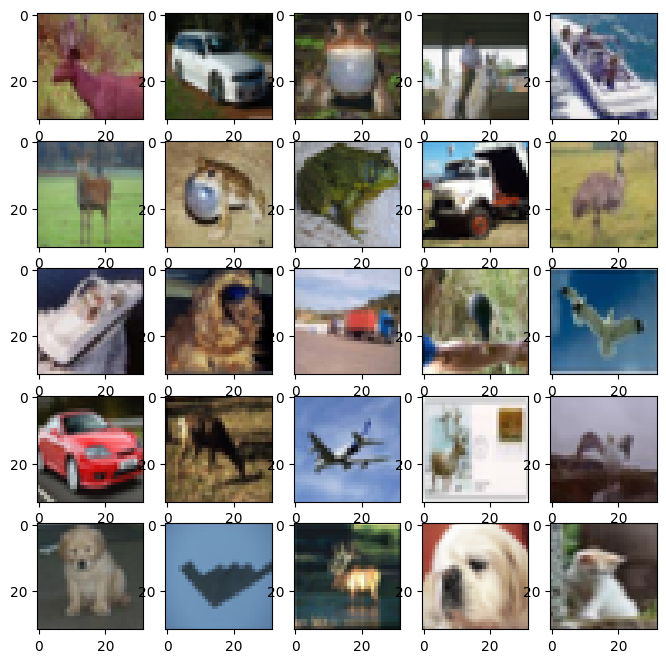

In [260]:
fig, ax = plt.subplots(5,5, figsize=(8,8))
np.random.seed(101)
for index, number in enumerate(np.random.randint(0, 5000, 25)):
    img = next(iter(DataLoader(
        to_show,
        batch_size=64,
        shuffle=True
    )))[0][0]
    ax[index//5, index%5].imshow(transforms.ToPILImage()(img))

In [369]:
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Обучение
for epoch in range(15):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f'Epoch {epoch+1}, Loss: {total_loss:.4f}')

Epoch 1, Loss: 1120.2116
Epoch 2, Loss: 807.9018
Epoch 3, Loss: 662.8217
Epoch 4, Loss: 562.1257
Epoch 5, Loss: 478.5245
Epoch 6, Loss: 409.5934
Epoch 7, Loss: 340.7249
Epoch 8, Loss: 274.7772
Epoch 9, Loss: 216.1781
Epoch 10, Loss: 169.9928
Epoch 11, Loss: 136.2647
Epoch 12, Loss: 106.4044
Epoch 13, Loss: 92.6424
Epoch 14, Loss: 76.1816
Epoch 15, Loss: 78.5924


In [370]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

Test Accuracy: 73.08%
